In [1]:
base_dir = 'datasets/cats_and_dogs'

In [2]:
input_shape=(128, 128, 3)

In [3]:
from keras.applications import MobileNet
conv_base = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
conv_base.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
__________

In [4]:
from keras.layers import *
from keras.models import *

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,423,681
Trainable params: 7,401,793
Non-trainable params: 21,888
_________________________________________________________________


In [5]:
print('weight count before conv_base freezing: ', len(model.trainable_weights))
conv_base.trainable = False
print('weight count after conv_base freezing: ', len(model.trainable_weights))
model.summary()

weight count before conv_base freezing:  85
weight count after conv_base freezing:  4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_128 (Model)   (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4194560   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 7,423,681
Trainable params: 4,194,817
Non-trainable params: 3,228,864
_________________________________________________________________


In [6]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
import os
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=input_shape[:2],
    batch_size = 20,
    class_mode = 'binary'
)

val_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'validation'),
   target_size=input_shape[:2],
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=input_shape[:2],
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [9]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50
).history

Epoch 1/30
100/100 [==============================] - 16s 156ms/step - loss: 0.4218 - acc: 0.8135 - val_loss: 0.1864 - val_acc: 0.9240
Epoch 2/30
100/100 [==============================] - 13s 129ms/step - loss: 0.2495 - acc: 0.8995 - val_loss: 0.1025 - val_acc: 0.9590
Epoch 3/30
100/100 [==============================] - 13s 126ms/step - loss: 0.2319 - acc: 0.9095 - val_loss: 0.1051 - val_acc: 0.9600
Epoch 4/30
100/100 [==============================] - 13s 127ms/step - loss: 0.2194 - acc: 0.9115 - val_loss: 0.1329 - val_acc: 0.9490
Epoch 5/30
100/100 [==============================] - 13s 129ms/step - loss: 0.2052 - acc: 0.9195 - val_loss: 0.0868 - val_acc: 0.9680
Epoch 6/30
100/100 [==============================] - 13s 126ms/step - loss: 0.1933 - acc: 0.9255 - val_loss: 0.0747 - val_acc: 0.9720
Epoch 7/30
100/100 [==============================] - 13s 126ms/step - loss: 0.1829 - acc: 0.9275 - val_loss: 0.1341 - val_acc: 0.9570
Epoch 8/30
100/100 [==============================] - 1

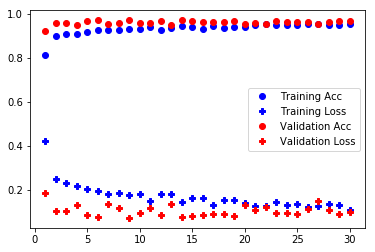

In [13]:
import matplotlib.pyplot as plt
epoch = range(1, len(history['acc']) + 1)
plt.clf()
plt.plot(epoch, history['acc'], 'bo', label='Training Acc')
plt.plot(epoch, history['loss'], 'bP', label='Training Loss')
plt.plot(epoch, history['val_acc'], 'ro', label='Validation Acc')
plt.plot(epoch, history['val_loss'], 'rP', label='Validation Loss')
plt.legend()
plt.show()

In [11]:
score = model.evaluate_generator(test_generator, 50)

In [12]:
print("Loss : ", score[0], "\tACC : ", score[1])

Loss :  0.11964702548168134 	ACC :  0.9669999933242798
